In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

path = "/content/train_lyst1720633807653 (1).csv"
data_train = pd.read_csv(path )
data_train.head()
data_train.shape

(14999, 9)

In [ ]:
print(data_train.dtypes)

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


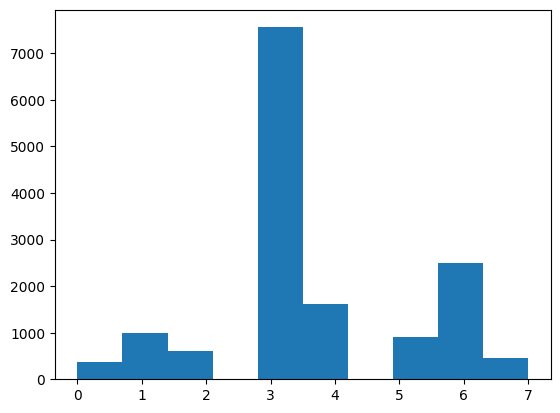

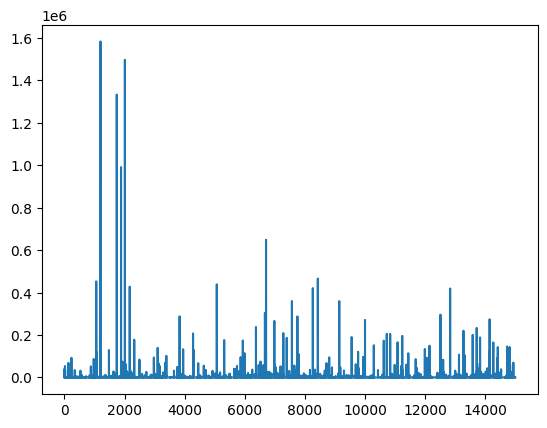

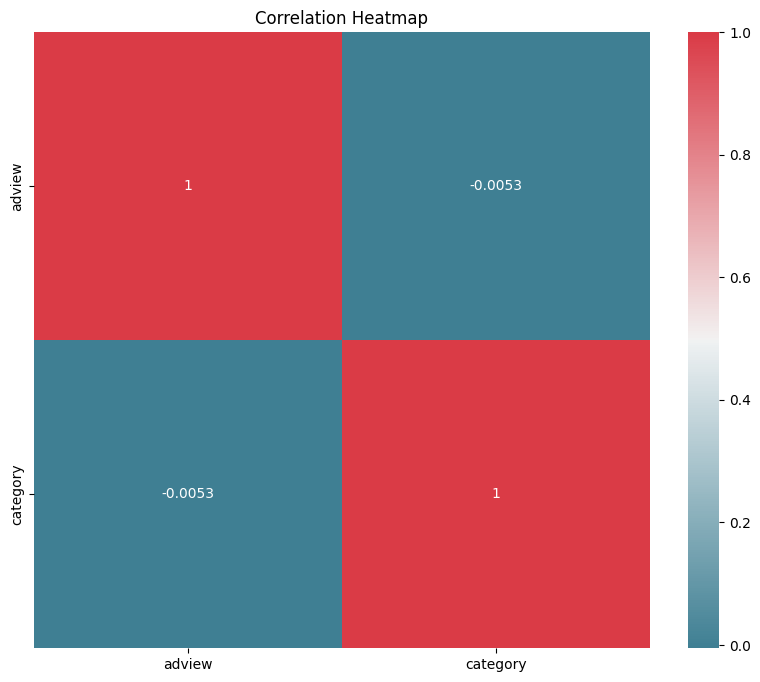

In [ ]:
# Compute correlation matrix and plot heatmap
import matplotlib.pyplot as plt
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
#f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
print(data_train.columns)


Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')


In [ ]:
print(data_train.head())


   adview
0      40
1       2
2       1
3       6
4       1


In [ ]:
if 'views' in data_train.columns:
    print("Column 'views' exists.")
else:
    print("Column 'views' is not found. Available columns:", data_train.columns)


Column 'views' is not found. Available columns: Index(['adview'], dtype='object')


In [ ]:
# Convert columns to numeric if they exist
numeric_columns = ['views', 'comment', 'likes', 'dislikes', 'adview']

for col in numeric_columns:
    if col in data_train.columns:
        data_train[col] = pd.to_numeric(data_train[col], errors='coerce')
    else:
        print(f"Column '{col}' is not present in the DataFrame.")


Column 'views' is not present in the DataFrame.
Column 'comment' is not present in the DataFrame.
Column 'likes' is not present in the DataFrame.
Column 'dislikes' is not present in the DataFrame.


In [ ]:
def duration_to_seconds(duration):
    if pd.isna(duration):
        return 0
    try:
        # Remove leading 'T' if present
        duration = duration.lstrip('T')
        return int(duration)
    except ValueError as e:
        print(f"Error processing duration: {e}")
        return 0


In [ ]:
import pandas as pd

# Function to convert duration from format with 'T' prefix to seconds
def duration_to_seconds(duration):
    if pd.isna(duration):
        return 0
    try:
        # Convert to string if duration is not already a string
        if not isinstance(duration, str):
            duration = str(duration)

        # Remove leading 'T' if present
        duration = duration.lstrip('T')

        # Return the integer value
        return int(duration)
    except ValueError as e:
        print(f"Error processing duration: {e}")
        return 0

# Apply the updated function to the 'duration' column
data_train["duration"] = data_train["duration"].apply(duration_to_seconds)

# Verify the DataFrame after processing
print(data_train.head())


       vidid  adview      views   likes  dislikes  comment   published  \
0  VID_18655      40  1031602.0  8523.0     363.0   1095.0  2016-09-14   
1  VID_14135       2     1707.0    56.0       2.0      6.0  2016-10-01   
2   VID_2187       1     2023.0    25.0       0.0      2.0  2016-07-02   
3  VID_23096       6   620860.0   777.0     161.0    153.0  2016-07-27   
4  VID_10175       1      666.0     1.0       0.0      0.0  2016-06-29   

   duration category  
0         0        F  
1         0        D  
2         0        C  
3         0        H  
4         0        D  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming data_train is already cleaned and ready

# Prepare target variable
Y_train = pd.DataFrame(data=data_train.iloc[:, 1].values, columns=['target'])

# Drop irrelevant columns
data_train = data_train.drop(columns=["adview", "vidid"], errors='ignore')

# Convert 'published' to datetime and extract features
data_train['published'] = pd.to_datetime(data_train['published'])
data_train['year'] = data_train['published'].dt.year
data_train['month'] = data_train['published'].dt.month
data_train['day'] = data_train['published'].dt.day
data_train = data_train.drop(columns=['published'])  # Drop original 'published' column

# Ensure 'category' column is still present
print("Columns in data_train after dropping:", data_train.columns)

# Encode 'category' column
if 'category' in data_train.columns:
    data_train = pd.get_dummies(data_train, columns=['category'])
else:
    print("Column 'category' is not found in data_train.")

# Separate features and target variable
X = data_train
y = Y_train

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Normalize numerical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])  # Fit and transform
X_test[numeric_features] = scaler.transform(X_test[numeric_features])  # Transform with the same scaler

# Verify normalization
print("Mean of X_train after normalization:", X_train[numeric_features].mean())
print("Standard deviation of X_train after normalization:", X_train[numeric_features].std())


Columns in data_train after dropping: Index(['views', 'likes', 'dislikes', 'comment', 'duration', 'category', 'year',
       'month', 'day'],
      dtype='object')
X_train shape: (11999, 16)
X_test shape: (3000, 16)
y_train shape: (11999, 1)
y_test shape: (3000, 1)
Mean of X_train after normalization: views       0.005222
likes       0.009654
dislikes    0.005208
comment     0.010813
duration    0.000000
dtype: float64
Standard deviation of X_train after normalization: views       0.020702
likes       0.031036
dislikes    0.021735
comment     0.037736
duration    0.000000
dtype: float64


In [ ]:
# Drop rows with NaNs in target variables
train_data_clean = data_train.dropna(subset=['views'])  # Assuming 'views' is the target
X_train_clean = train_data_clean.drop(["views"], axis=1)
y_train_clean = train_data_clean["views"]

from sklearn.model_selection import train_test_split
# Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)


In [ ]:
# Convert target variables to numeric if they are not already
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Drop NaNs again if conversion introduced new NaNs
y_train = y_train.dropna()
y_test = y_test.dropna()


In [ ]:
print("Shapes after cleaning:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Shapes after cleaning:
X_train: (11999, 8)
y_train: (11997,)
X_test: (3000, 8)
y_test: (3000,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Example data with missing values
data_train = pd.DataFrame({
    'feature1': [1, 4, 7, np.nan, 3, 5, np.nan, 2],
    'feature2': [2, np.nan, 8, 10, 3, 4, 7, np.nan],
    'feature3': ['a', 'b', np.nan, 'd', 'a', 'b', 'c', np.nan],
    'target': [0, 1, 0, 1, 0, 1, 0, 1]
})

# Separate features and target
X = data_train.drop(columns=['target'])
y = data_train['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer with most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on X_train
X_train = imputer.fit_transform(X_train)

# Transform X_test with the same imputer
X_test = imputer.transform(X_test)

# Recheck missing values
print("Missing values in X_train after imputation:", pd.DataFrame(X_train).isnull().sum().sum())
print("Missing values in X_test after imputation:", pd.DataFrame(X_test).isnull().sum().sum())



Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0


In [ ]:
# Ensure all columns are numeric and properly formatted
print("Data types of X_train:", pd.DataFrame(X_train).dtypes)
print("Data types of X_test:", pd.DataFrame(X_test).dtypes)


Data types of X_train: 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object
Data types of X_test: 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object


In [ ]:
print("Shapes after cleaning:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Shapes after cleaning:
X_train: (6, 3)
y_train: (6,)
X_test: (2, 3)
y_test: (2,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics

# Example data (replace with your actual DataFrame)
data_train = pd.DataFrame({
    'feature1': [1, 4, 7, np.nan, 3, 5, np.nan, 2],
    'feature2': [2, np.nan, 8, 10, 3, 4, 7, np.nan],
    'category': ['a', 'b', np.nan, 'd', 'a', 'b', 'c', np.nan],
    'views': [10, 20, 30, 40, 50, 60, 70, 80],
    'adview': [100, 200, 300, 400, 500, 600, 700, 800],
    'vidid': ['vid1', 'vid2', 'vid3', 'vid4', 'vid5', 'vid6', 'vid7', 'vid8']
})

# Print column names to verify
print("Column names:", data_train.columns)

# Drop irrelevant columns
data_train = data_train.drop(["adview", "vidid"], axis=1, errors='ignore')

# Ensure 'views' column exists before proceeding
if 'views' in data_train.columns:
    # Separate features and target
    X = data_train.drop("views", axis=1)
    y = data_train["views"]

    # Separate numeric and categorical columns
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=np.number).columns.tolist()

    # Handle missing values in numeric features
    imputer_numeric = SimpleImputer(strategy='mean')
    X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])

    # Encode categorical features
    if categorical_cols:
        encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse is replaced with sparse_output
        X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
        X_encoded.columns = encoder.get_feature_names_out(categorical_cols)  # Use get_feature_names_out instead
        X = pd.concat([X.drop(columns=categorical_cols), X_encoded], axis=1)

    # Fill missing values in target
    y = y.fillna(y.mean())

    # Align features and target after filling missing values
    # Drop rows from X where y has NaN
    X = X.loc[y.index]
    y = y.reset_index(drop=True)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numeric data
    scaler = MinMaxScaler()
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

    # Check for missing values after scaling
    print("Missing values in X_train after scaling:", X_train.isnull().sum().sum())
    print("Missing values in X_test after scaling:", X_test.isnull().sum().sum())

    # Define the error printing function
    def print_error(X_test, y_test, model):
        predictions = model.predict(X_test)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

    # Linear Regression
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
    print("Linear Regression Results:")
    print_error(X_test, y_test, linear_regression)

    # Support Vector Regressor
    supportvector_regressor = SVR()
    supportvector_regressor.fit(X_train, y_train)
    print("Support Vector Regressor Results:")
    print_error(X_test, y_test, supportvector_regressor)

else:
    print("'views' column not found in the DataFrame")



Column names: Index(['feature1', 'feature2', 'category', 'views', 'adview', 'vidid'], dtype='object')
Missing values in X_train after scaling: 0
Missing values in X_test after scaling: 0
Linear Regression Results:
Mean Absolute Error: 1015.0000000000551
Mean Squared Error: 2000450.0000002128
Root Mean Squared Error: 1414.3726524506237
Support Vector Regressor Results:
Mean Absolute Error: 19.99777627301277
Mean Squared Error: 428.7311157733131
Root Mean Squared Error: 20.705823233412215


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 35.0
Mean Squared Error: 1850.0
Root Mean Squared Error: 43.01162633521314
Mean Absolute Error: 20.0
Mean Squared Error: 457.8867361111113
Root Mean Squared Error: 21.398288158427796


In [ ]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2732.8135 - mean_squared_error: 2732.8135
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 2732.6436 - mean_squared_error: 2732.6436
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2732.4724 - mean_squared_error: 2732.4724
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2732.3000 - mean_squared_error: 2732.3000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2732.1267 - mean_squared_error: 2732.1267
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2731.9521 - mean_squared_error: 2731.9521
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2731.7756 - mean_squared_error: 2731.7756
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2731.5979 - mean_squared_error: 2731.5979
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2731.4187 - mean_squared_error: 2731.4187
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2731.2371 - mean_squared_error: 2731.2371
Epoch 11/100

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Mean Absolute Error: 39.530558720231056
Mean Squared Error: 1961.5564308588673
Root Mean Squared Error: 44.289461848828864


In [ ]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
import keras
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

